In [713]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import LabelEncoder

In [714]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.read_csv('data.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head(2)

,name,brand,2G,3G,4G,5G,Announced,Status,Weight,Length,Width,Diameter,SIM,Display Type,Display Size,ppi,body ratio,OS,battery_capacity,Price,CPU,ratio,pixel,WLAN,Colors,Sensors,Bluetooth,GPU,Loudspeaker,3.5mm jack,Chipset,Network,Internal,Card slot,RAM,Storage
0,alcatel 1b (2022),alcatel,True,True,True,False,2022.0,Available,172.0,146.7,71.9,10,Nano-SIM,TFT LCD,5.5,293.0,74.0,Android 11,3000.0,100.0,4.0,18:9,1036800.0,"Wi-Fi 802.11 b/g/n, Wi-Fi Direct","Prime Black, Atlantic Blue",Accelerometer,"5.0, A2DP",PowerVR GE8300,True,True,Mediatek MT6761 Helio A22 (12 nm),"GSM / HSPA / LTE HSPA 42.2/11.1 Mbps, LTE Cat4...",32GB 2GB RAM,microSDXC (dedicated slot),2.0,32.0
1,alcatel 1l pro (2021),alcatel,True,True,True,False,2021.0,Available,190.0,156.4,74.8,9.7,Nano-SIM,IPS LCD,6.1,282.0,78.1,Android 11,3000.0,110.0,8.0,5:9,1123200.0,"Wi-Fi 802.11 b/g/n, Wi-Fi Direct","Power Grey, Twilight Blue","Fingerprint (rear-mounted), accelerometer, pro...","4.2, A2DP",IMG8322,True,True,Unisoc SC9863A (28nm),"GSM / HSPA / LTE HSPA 21.1/5.76 Mbps, LTE Cat4...",32GB 2GB RAM,microSDXC (uses shared SIM slot),2.0,32.0


In [715]:
df.drop(columns=['name'], inplace=True)
df.drop(columns=['Internal'], inplace=True)

The "name" column should be removed because it consists of various parts including the brand name of the smart device, its trademark,and version :
 resulting in a large number of unique values. On the other hand, we have the most important part, which is the brand name, in the "brand" column, which we know likely directly influences the price.




The "internal" column should be removed because the information it contains is already covered in the "storage" and "RAM" columns.
 Moreover, this column is a combined column with an object data type that does not serve any purpose.

In [716]:
df['Length'] = pd.to_numeric(df['Length'], errors='coerce')
df['Width'] = pd.to_numeric(df['Width'], errors='coerce')
df['Diameter'] = pd.to_numeric(df['Diameter'], errors='coerce')

df['Length'] = df['Length'].astype('float64')
df['Width'] = df['Width'].astype('float64')
df['Diameter'] = df['Diameter'].astype('float64')

The "length/width/diameter" columns actually contain decimal data, so the object data type assigned to them is incorrect.
 
 Therefore, we should convert them to 'float' type.

Because logically, the individual dimensions of length, width, and diameter may not directly correlate with the price of smart devices,
 we decided to create new column named "size" (representing volume) and "area" (representing surface area). This allows us to analyze combined correlation features related to these three columns more effectively.

In [717]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             2651 non-null   object 
 1   2G                2651 non-null   bool   
 2   3G                2651 non-null   bool   
 3   4G                2651 non-null   bool   
 4   5G                2651 non-null   bool   
 5   Announced         2651 non-null   float64
 6   Status            2651 non-null   object 
 7   Weight            2651 non-null   float64
 8   Length            2647 non-null   float64
 9   Width             2650 non-null   float64
 10  Diameter          2646 non-null   float64
 11  SIM               2651 non-null   object 
 12  Display Type      2651 non-null   object 
 13  Display Size      2651 non-null   float64
 14  ppi               2651 non-null   float64
 15  body ratio        2651 non-null   float64
 16  OS                2651 non-null   object 


In [718]:
df.describe()

,Announced,Weight,Length,Width,Diameter,Display Size,ppi,body ratio,battery_capacity,Price,CPU,pixel,RAM,Storage
count,2651.000000,2651.000000,2647.000000,2650.000000,2646.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2372.000000,2.651000e+03,2651.000000,2651.000000
mean,2016.577518,190.389325,154.623083,79.658981,9.101209,5.759838,312.312335,71.775556,3385.437948,242.896775,5.847808,1.576779e+06,2.901974,46.621613
std,3.656827,97.208564,31.584492,26.155354,1.641620,1.628346,101.907171,11.262514,1627.512406,193.726059,2.372880,1.181280e+06,2.493559,60.823522
min,2010.000000,89.300000,98.700000,46.000000,4.700000,2.200000,121.000000,25.500000,50.000000,20.000000,2.000000,7.680000e+04,0.062500,0.039062
25%,2014.000000,140.100000,136.350000,68.525000,8.000000,4.700000,233.000000,64.650000,2070.000000,130.000000,4.000000,5.184000e+05,1.000000,8.000000
50%,2016.000000,167.000000,152.400000,73.950000,8.800000,5.500000,288.000000,71.400000,3000.000000,190.000000,8.000000,1.094400e+06,2.000000,16.000000
75%,2020.000000,195.000000,163.300000,76.700000,9.800000,6.530000,400.000000,81.800000,4500.000000,290.000000,8.000000,2.527200e+06,4.000000,64.000000
max,2024.000000,950.000000,333.000000,252.700000,20.100000,14.600000,807.000000,94.100000,11560.000000,2000.000000,10.000000,8.294400e+06,16.000000,512.000000


### Price - most importnt

In [719]:
df['Price'].describe()

count    2651.000000
mean      242.896775
std       193.726059
min        20.000000
25%       130.000000
50%       190.000000
75%       290.000000
max      2000.000000
Name: Price, dtype: float64

### Brand

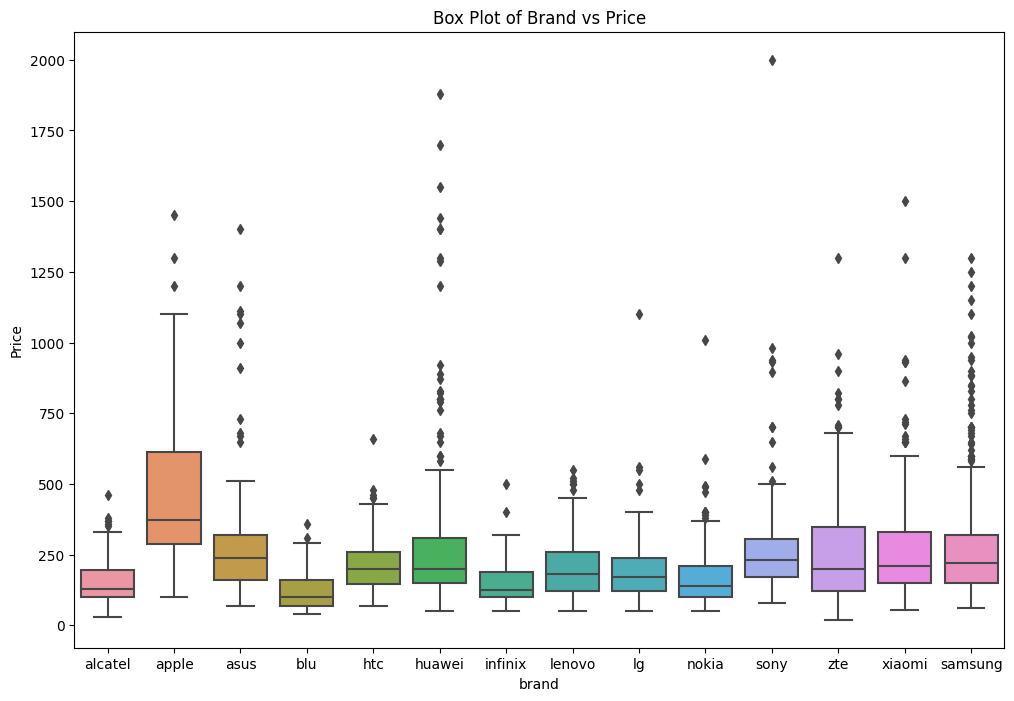

In [720]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['brand'], y=df['Price'], data=df)
plt.title('Box Plot of Brand vs Price')
plt.show()

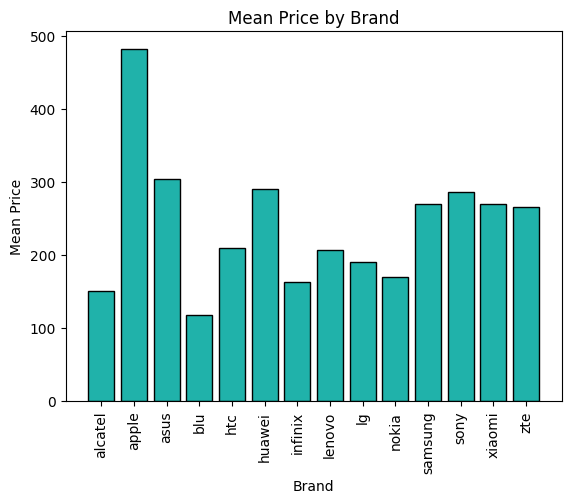

In [721]:
mean_prices = df.groupby('brand')['Price'].mean()


plt.bar(mean_prices.index, mean_prices.values, color='lightseagreen', edgecolor='black')

plt.xlabel('Brand')
plt.ylabel('Mean Price')
plt.xticks(rotation='vertical')
plt.title('Mean Price by Brand')
plt.show()

In this chart, the relationship between different brands present in the data and their average prices is examined. As expected, the average prices of smart devices from Apple, including watches, phones, and iPads, show a significant difference compared to other brands.

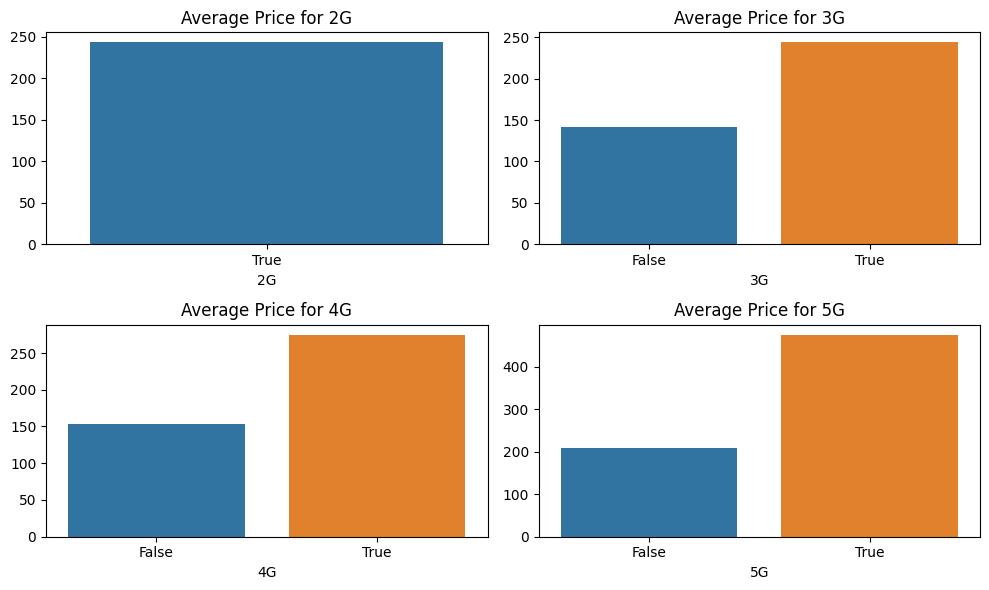

In [722]:
avg_price_2G = df.groupby('2G')['Price'].mean()
avg_price_3G = df.groupby('3G')['Price'].mean()
avg_price_4G = df.groupby('4G')['Price'].mean()
avg_price_5G = df.groupby('5G')['Price'].mean()


plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.barplot(x=avg_price_2G.index, y=avg_price_2G.values)
plt.title('Average Price for 2G')

plt.subplot(2, 2, 2)
sns.barplot(x=avg_price_3G.index, y=avg_price_3G.values)
plt.title('Average Price for 3G')

plt.subplot(2, 2, 3)
sns.barplot(x=avg_price_4G.index, y=avg_price_4G.values)
plt.title('Average Price for 4G')

plt.subplot(2, 2, 4)
sns.barplot(x=avg_price_5G.index, y=avg_price_5G.values)
plt.title('Average Price for 5G')

plt.tight_layout()
plt.show()


In [723]:
df.drop(columns=['2G'], inplace=True)

As we see in the plots, all the phones in our dataset support 2G SIM band, so they won't have any impact on our model.

Regarding 3G/4G/5G , it's obvious that the price difference between devices with 5G and those without it is greater than that between 3G and 4G. Therefore, we can consider incorporating all three columns into our model, but we should keep in mind that the likelihood of 5G's impact being greater than the others.

### Status

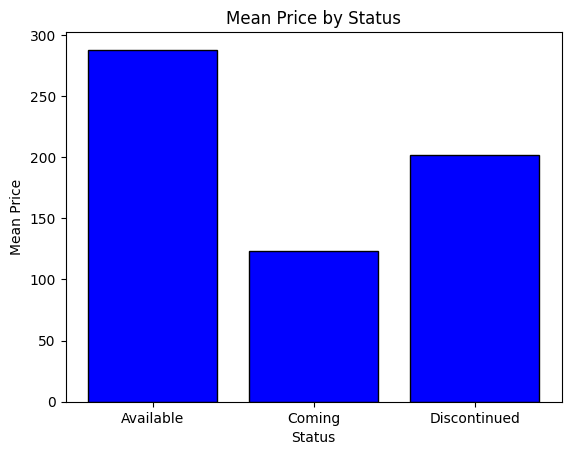

In [724]:
mean_prices = df.groupby('Status')['Price'].mean()

plt.bar(mean_prices.index, mean_prices.values, color='blue', edgecolor='black')

plt.xlabel('Status')
plt.ylabel('Mean Price')
plt.title('Mean Price by Status')
plt.show()

We observe that the "status" of devices somewhat influences their prices, and it's logical that the price of discontinued devices would be lower compared to available ones... Therefore, we won't remove it, and we won't heavily emphasize its impact on the model either.

## Correlation Heat map : for cheking correlation of numeric columns with Price column

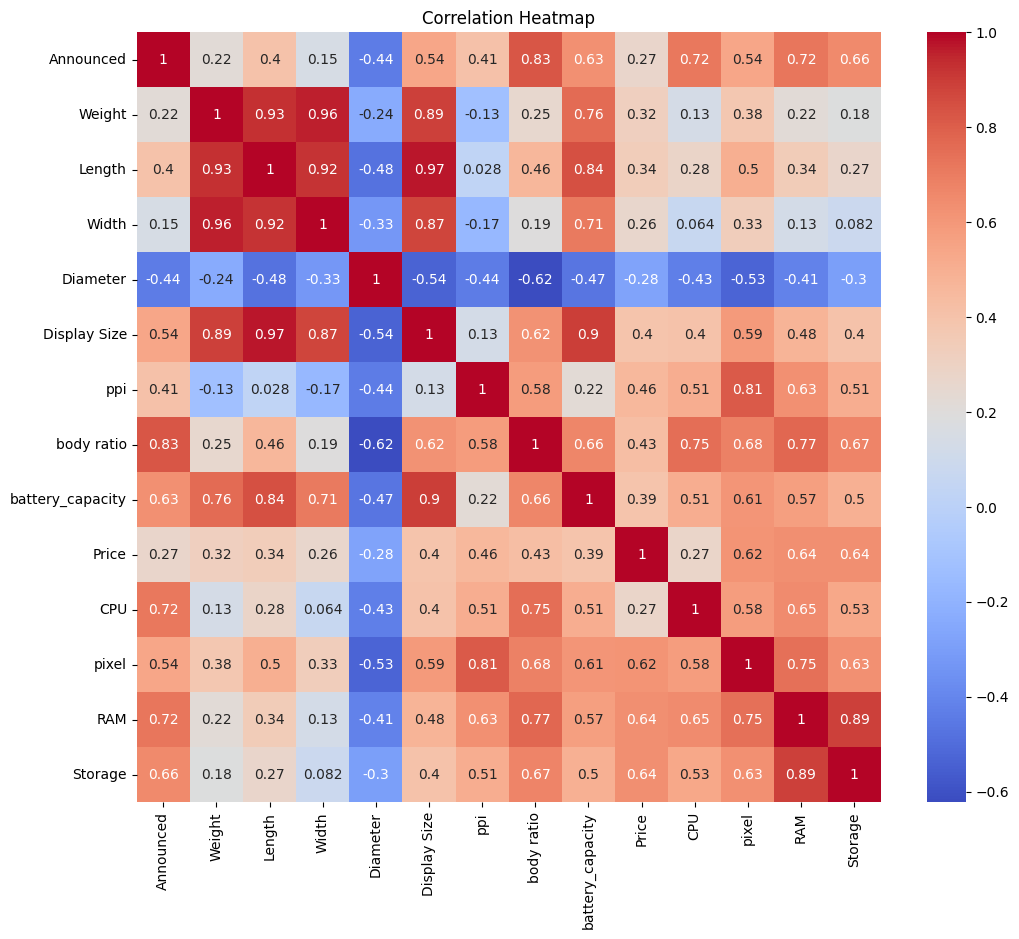

In [725]:
numeric_columns = df.select_dtypes(include=['float64'])


correlation_matrix = numeric_columns.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [726]:
price_correlation = correlation_matrix['Price'].sort_values(ascending=False)

print(price_correlation)

Price               1.000000
RAM                 0.638511
Storage             0.637402
pixel               0.618491
ppi                 0.456231
body ratio          0.425506
Display Size        0.397758
battery_capacity    0.392868
Length              0.335893
Weight              0.320519
CPU                 0.272412
Announced           0.266497
Width               0.262072
Diameter           -0.279430
Name: Price, dtype: float64


Here we can observe the correlation between each of the numerical columns with each other, and most importantly, we can examine the relationship and correlation of these numerical columns with the "price" column.

We regard a correlation above approximately 40% to suggest a relatively good correlation, and we consider the likelihood of these columns significantly impacting the model and price prediction to be relatively high.

Furthermore, we intend to examine columns with lower correlations.

### Pair plot for mor specific survey

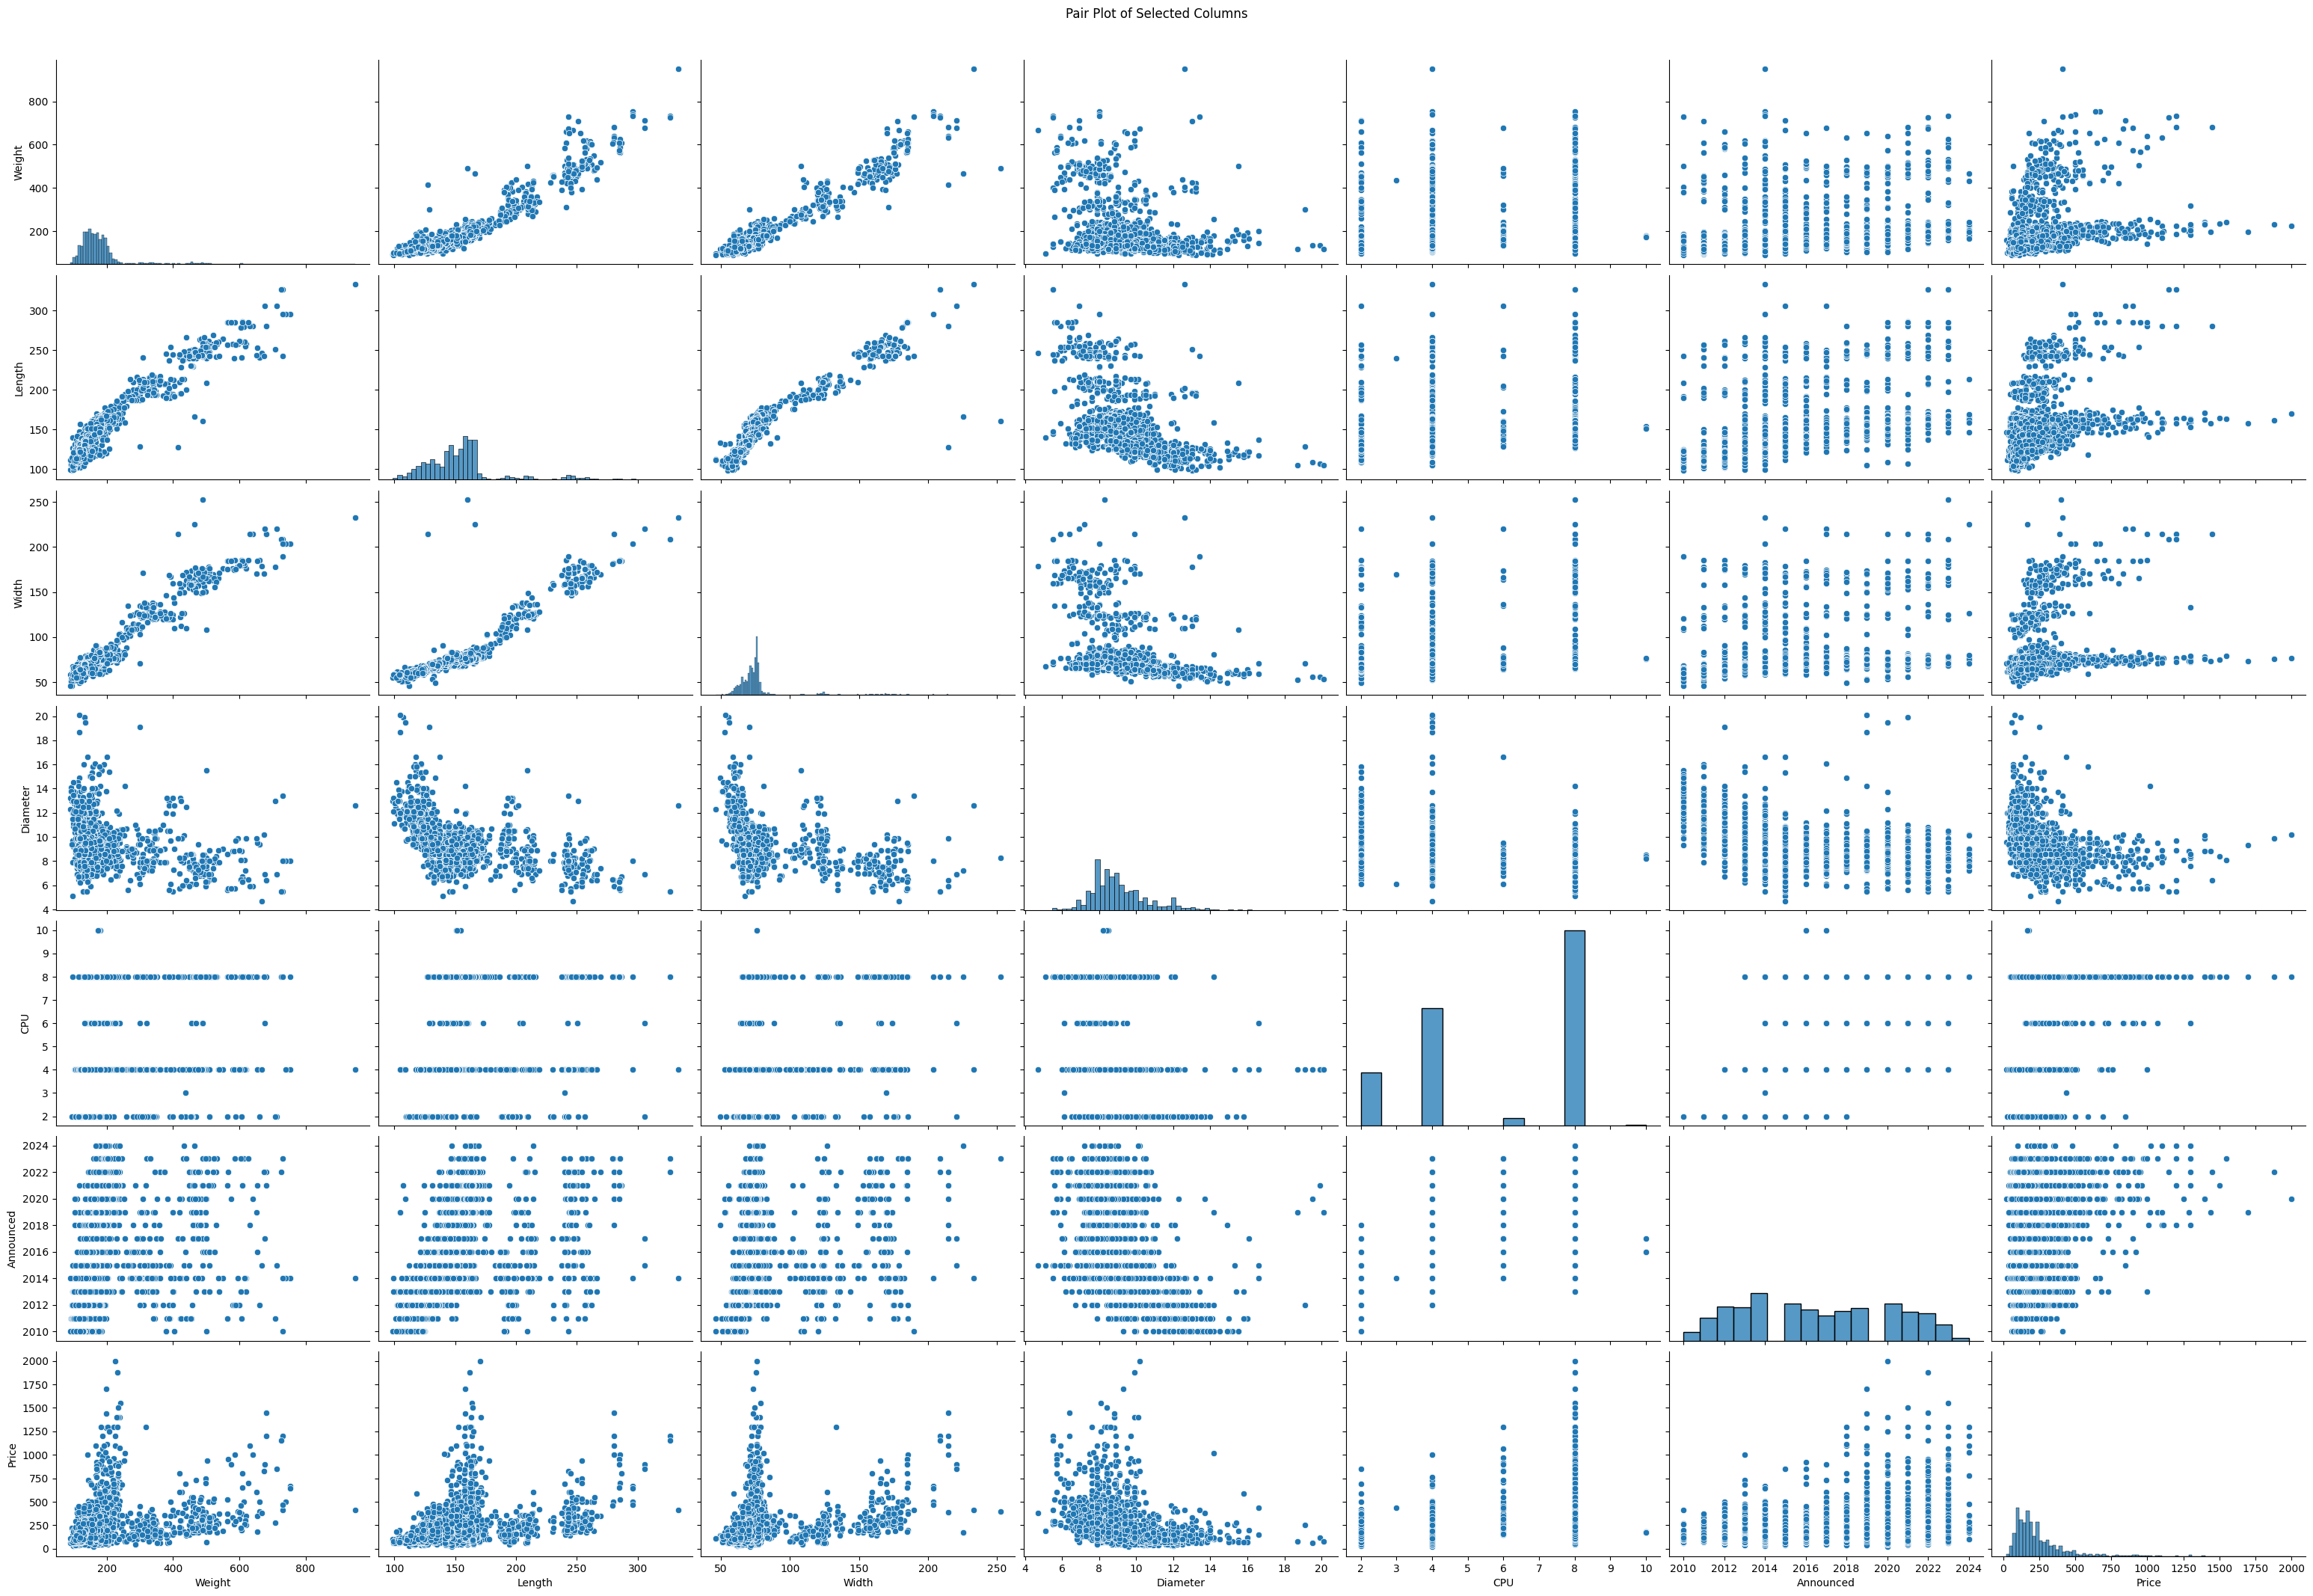

In [727]:
selected_columns = ['Weight' ,'Length', 'Width' ,'Diameter', 'CPU' ,'Announced', 'Price' ]

sns.pairplot(df[selected_columns], height=3, aspect=1.5)
plt.suptitle('Pair Plot of Selected Columns', y=1.02)
plt.show()


Regarding the columns "weight/length/width/diameter" and comparing their histograms with the "price" column:

As observed, there is variability in the values of these columns, and although the density of data points may be high in some regions, there are still distinct values present. Therefore, we will proceed with these four columns to the next stage, and through trial and error, we will examine the impact of using them on improving the model's performance.

### Announced Year

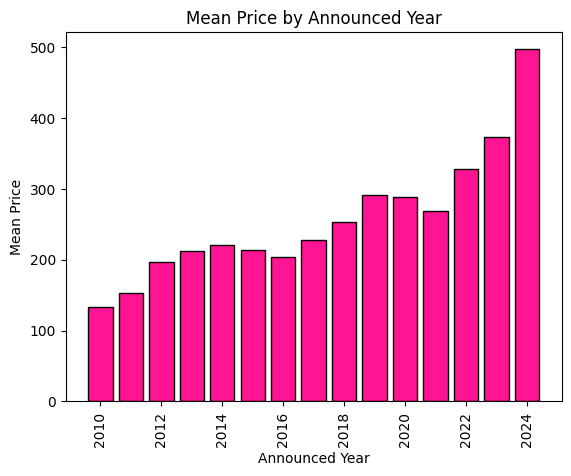

In [728]:
mean_prices_by_announced = df.groupby('Announced')['Price'].mean()

plt.bar(mean_prices_by_announced.index, mean_prices_by_announced.values, color='deeppink', edgecolor='black')

plt.xlabel('Announced Year')
plt.ylabel('Mean Price')
plt.xticks(rotation='vertical')
plt.title('Mean Price by Announced Year')
plt.show()

### CPU

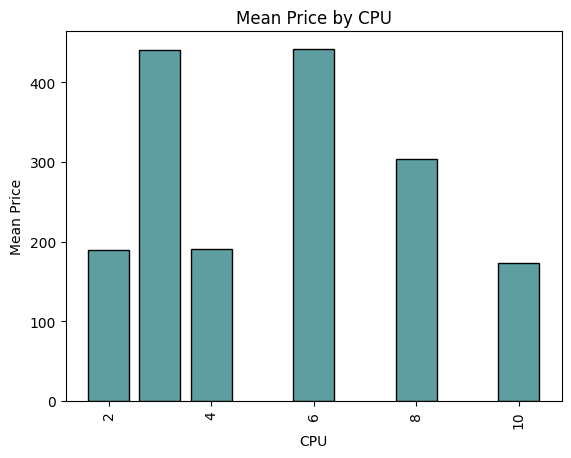

In [729]:
mean_prices_by_announced = df.groupby('CPU')['Price'].mean()

plt.bar(mean_prices_by_announced.index, mean_prices_by_announced.values, color='cadetblue', edgecolor='black')

plt.xlabel('CPU')
plt.ylabel('Mean Price')
plt.xticks(rotation='vertical')
plt.title('Mean Price by CPU')
plt.show()

From these two histogram plots, we can deduce the following:

The average prices of smart devices have remained relatively consistent over the years, showing minimal variation among them.And the reason for the higher average price of devices in 2024 is likely due to the fact that it's still early in the year, and the number of devices released during this year is significantly lower and not comparable to previous years.Therefore, due to minor differences, we will include this column in the modeling stage, but we don't expect it to contribute significantly to improving the model's performance.

Regarding the "CPU" column, it's evident that devices with NULL CPU values have higher average prices. Therefore, we won't make a decision about this column yet, and we'll assess it after handling the NULL values.

## SIM

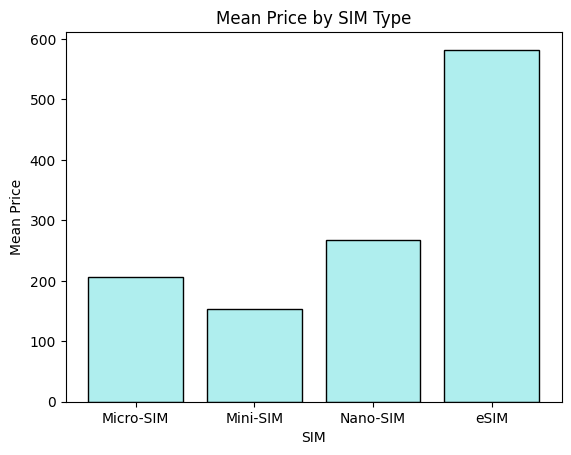

In [730]:
mean_prices = df.groupby('SIM')['Price'].mean()

plt.bar(mean_prices.index, mean_prices.values, color='paleturquoise', edgecolor='black')

plt.xlabel('SIM')
plt.ylabel('Mean Price')
plt.title('Mean Price by SIM Type')
plt.show()

Considering the clear and distinct differences in the average prices associated with different SIM card types, we can confidently state that the type of SIM card will play a significant role in the model's outcomes.

## Display Type

In [731]:
df['Display Type'].unique()

array(['TFT LCD', 'IPS LCD', 'TN TFT LCD', 'Super AMOLED', 'TFT',
       'AMOLED', 'TFT, 256K colors',
       'LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolby Vision, 1000 nits (typ), 2000 nits (HBM)',
       'Super Retina XDR OLED, HDR10, Dolby Vision, 1000 nits (HBM), 2000 nits (peak)',
       'Liquid Retina XDR mini-LED LCD, 120Hz, HDR10, Dolby Vision, 1000 nits (typ), 1600 nits (peak)',
       'Super Retina XDR OLED, HDR10, Dolby Vision, 800 nits (HBM), 1200 nits (peak)',
       'Retina IPS LCD, 625 nits (typ)',
       'Super Retina XDR OLED, 120Hz, HDR10, Dolby Vision, 1000 nits (HBM), 1200 nits (peak)',
       'Retina IPS LCD, 500 nits (typ)',
       'Super Retina XDR OLED, HDR10, Dolby Vision, 625 nits (HBM), 1200 nits (peak)',
       'IPS LCD, 120Hz, 600 nits (typ)',
       'Liquid Retina IPS LCD, 625 nits (typ)', 'IPS LCD, 120Hz',
       'Super Retina OLED, HDR10, Dolby Vision, 625 nits (HBM)',
       'Liquid Retina IPS LCD, 625 nits (HBM)', 'IPS LCD, 500 nits',
       'LTPO A

In [732]:
df['Display Type'] = df['Display Type'].str.split(',').str[0]

def categorize_display_type(display_type):
    if 'Retina' in display_type:
        return 'Retina'
    elif 'LCD' in display_type:
        return 'LCD'
    elif 'AMOLED' in display_type:
        return 'AMOLED'
    elif 'OLED' in display_type:
        return 'OLED'
    elif 'TFT' in display_type:
        return 'TFT'
    else:
        return 'Others'
    

df['Display Type'] = df['Display Type'].apply(categorize_display_type)

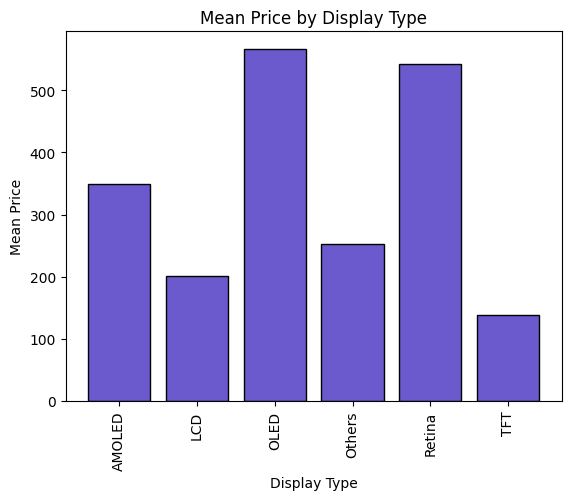

In [733]:
mean_prices = df.groupby('Display Type')['Price'].mean()

plt.bar(mean_prices.index, mean_prices.values, color='slateblue', edgecolor='black')

plt.xlabel('Display Type')
plt.ylabel('Mean Price')
plt.xticks(rotation='vertical')
plt.title('Mean Price by Display Type')
plt.show()

The significant price differences observed among devices with different display types indicate that this column is likely to have a positive and influential role in predicting the model's outcomes.

And logically, it makes sense that the prices of devices with AMOLED, Retina, and OLED displays are higher than others, as these display types are generally recognized as more advanced and higher quality in terms of technology and image quality.

## OS

In [734]:
df['OS'] = df['OS'].str.extract(r'^(\w+)')
df['OS'].unique()

array(['Android', 'KaiOS', 'Windows', 'Firefox', 'OS', 'iOS', 'iPadOS',
       'Phone', 'Mobile', 'HarmonyOS', 'EMUI', 'platform', 'Belle',
       'Anna', 'Symbian', 'FP1', 'MeeGo', 'Linux', 'Tizen'], dtype=object)

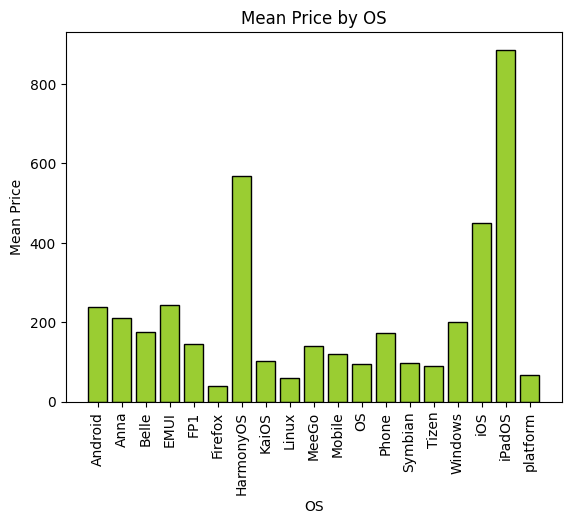

In [735]:
mean_prices = df.groupby('OS')['Price'].mean()

plt.bar(mean_prices.index, mean_prices.values, color='yellowgreen', edgecolor='black')

plt.xlabel('OS')
plt.ylabel('Mean Price')
plt.xticks(rotation='vertical')
plt.title('Mean Price by OS')
plt.show()

This conclusion is also likely to be among the most predictable and reliable results, similar to the brand column. We can confidently utilize this column in our model without concerns, as it is likely to provide trustworthy predictions.

## ratio

In [736]:
df['ratio'].unique()

array(['18:9', '5:9', '20:9', '19:9', '4:3', '16:10', '16:9', '5:3',
       '3:2', '7:9', '21:9', '3:9', '17:9'], dtype=object)

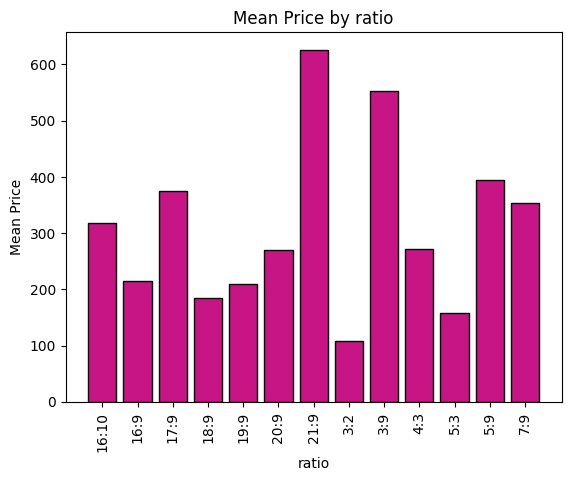

In [737]:
mean_prices = df.groupby('ratio')['Price'].mean()

plt.bar(mean_prices.index, mean_prices.values, color='mediumvioletred', edgecolor='black')

plt.xlabel('ratio')
plt.ylabel('Mean Price')
plt.xticks(rotation='vertical')
plt.title('Mean Price by ratio')
plt.show()

Regarding the "ratio" column, it can be said that it will likely be useful in certain parts of the model and at price selection boundaries. However, it cannot be decisively concluded whether it should be included or not. Therefore, we can proceed to the modeling stage with it and there ;we can decide through trial and error whether it is appropriate for inclusion among the final columns used in the model.

## bluetooth

In [738]:
df['Bluetooth'].unique()

array(['5.0, A2DP', '4.2, A2DP', '4.2, A2DP, LE', '5.0, A2DP, LE',
       '4.1, A2DP, LE', '4.0, A2DP, LE', '4.0, A2DP', '4.1, A2DP', '3.0',
       '3.0, A2DP', '2.1', 'Yes', '5.3, A2DP, LE', '5.3, A2DP, LE, EDR',
       '4.2, A2DP, EDR, LE', '5.0, A2DP, LE, EDR', '5.0, A2DP, EDR',
       '4.2, A2DP, EDR', '4.0, A2DP, EDR', '2.1, A2DP, EDR', '2.1, A2DP',
       '5.3, A2DP, LE, aptX HD, aptX Adaptive, aptX Lossless',
       '5.2, A2DP, LE, aptX HD, aptX Adaptive, aptX Lossless',
       '5.2, A2DP, LE, aptX HD, aptX Adaptive',
       '5.0, A2DP, LE, aptX Adaptive',
       '5.1, A2DP, LE, aptX HD, aptX Adaptive', '5.0, A2DP, LE, aptX HD',
       'v5.0, A2DP, LE', '4.1 or 4.2 (SDM630 only), A2DP, LE',
       '5.0, A2DP, EDR, LE, aptX', '5.0, A2DP, EDR, LE',
       '4.1, A2DP, EDR, LE', '4.2, A2DP, LE, aptX',
       '4.1, A2DP, LE, EDR, aptX', '4.1, A2DP, LE, aptX',
       '4.1, A2DP, aptX', '4.1, A2DP, EDR', '4.0, A2DP, LE, aptX',
       '3.0, A2DP, EDR', '5.2, A2DP, LE', '5.1, A2DP, LE', 

In [739]:
def check_bluetooth(value):
    parts = value.split(', ')
    version = None
    profiles = []

    for part in parts:
        if '.' in part:
            version = part
        elif part in ['A2DP', 'LE', 'aptX']:
            profiles.append(part)

    return version, profiles


df['Version'], df['Profiles'] = zip(*df['Bluetooth'].apply(check_bluetooth))

df.drop(columns=['Bluetooth'], inplace=True)

In [740]:
df['Version'].unique()

array(['5.0', '4.2', '4.1', '4.0', '3.0', '2.1', None, '5.3', '5.2',
       '5.1', 'v5.0', '4.1 or 4.2 (SDM630 only)',
       'LE (5.0 after SW update)', '3.1', 'EDR/ 4.0', '(5.1 for GOT-W29)',
       'v4.2', 'v4.1', '2.0', '4.0 or 4.1 (LTE version)',
       '4.2(Europe)/4.1(India)', '4.1/4.2', '5.4', '5.1 (India)',
       '5.1 / 5.2', '5.0 (Global)', '5.1 or 5.3', '4.0/4.1', 'A2DP; 4.1'],
      dtype=object)

In [741]:
df.drop(columns=['Version'], inplace=True)
df.drop(columns=['Profiles'], inplace=True)

The "Bluetooth" column, even after cleaning and manipulation, is not sufficiently usable for the model and categorically handling it would
 be illogical and incorrect. Therefore, we will remove it.

## GPU

In [742]:
announced_counts = df['Announced'].value_counts()

max_announced_values = df.groupby('Announced')['GPU'].apply(lambda x: x.value_counts().idxmax())

for year, gpu in max_announced_values.items():
    df.loc[(df['Announced'] == year) & (df['GPU'].isnull()), 'GPU'] = gpu


df['GPU'].isnull().sum()

0

In [743]:
def preprocess_gpu(gpu):
    if '-' in gpu:
        return gpu.split('-')[0].strip()
    else:
        return gpu.split()[0].strip()

df['GPU'] = df['GPU'].apply(preprocess_gpu)
df['GPU'].nunique()

49

In [744]:
def categorize_gpu(gpu):
    if 'Adreno' in gpu:
        return 'Adreno'
    elif 'Mali' in gpu:
        return 'Mali'
    elif 'PowerVR' in gpu:
        return 'PowerVR'
    elif 'Apple GPU' in gpu:
        return 'Apple GPU'
    elif 'Broadcom' in gpu:
        return 'Broadcom'
    else:
        return 'Others'

In [745]:
df['GPU'] = df['GPU'].apply(categorize_gpu)

df['GPU'].unique()

array(['PowerVR', 'Others', 'Adreno', 'Mali', 'Apple GPU', 'Broadcom'],
      dtype=object)

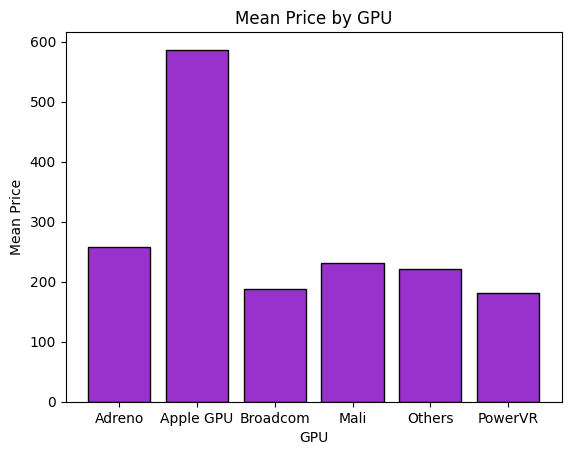

In [746]:
mean_prices = df.groupby('GPU')['Price'].mean()

plt.bar(mean_prices.index, mean_prices.values, color='darkorchid', edgecolor='black')

plt.xlabel('GPU')
plt.ylabel('Mean Price')
plt.title('Mean Price by GPU')
plt.show()

The prices of certain GPUs, particularly those belonging to the Apple brand, have significantly greater differences compared to others. While we can incorporate this price difference into the model through other columns such as brand or OS, utilizing this column separately will provide greater assistance to the model. Therefore, including it in the modeling stage will be beneficial.

## Loudspeaker and  3.5mm jack

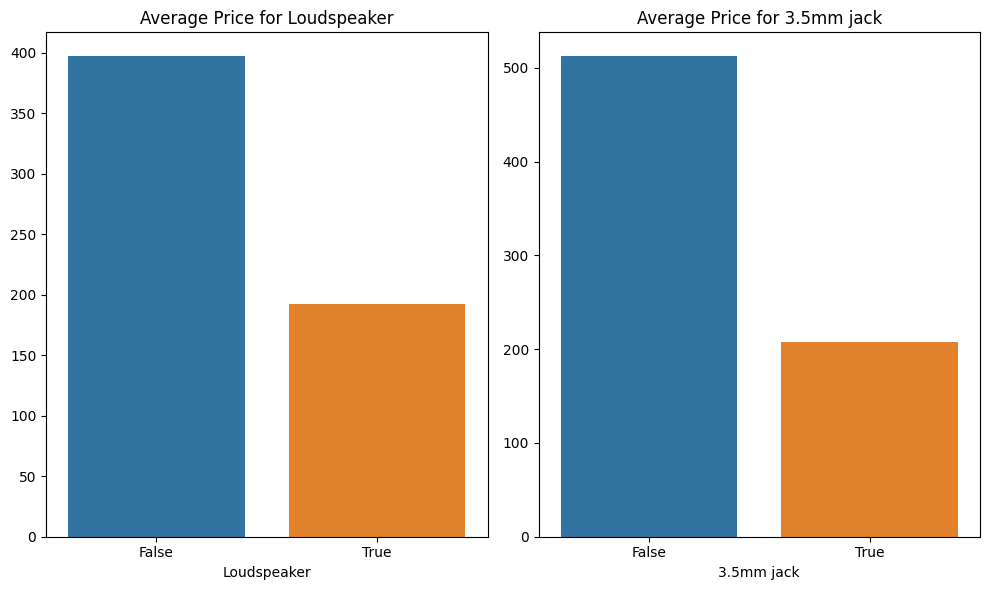

In [747]:
avg_price_Loudspeaker = df.groupby('Loudspeaker')['Price'].mean()
avg_price_jack= df.groupby('3.5mm jack')['Price'].mean()



plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=avg_price_Loudspeaker.index, y=avg_price_Loudspeaker.values)
plt.title('Average Price for Loudspeaker')

plt.subplot(1, 2, 2)
sns.barplot(x=avg_price_jack.index, y=avg_price_jack.values)
plt.title('Average Price for 3.5mm jack')


plt.tight_layout()
plt.show()


The difference in average prices based on the "true/false" values in these two columns appears to be distinguishable. Therefore, using them in the next stage seems like a good idea. We can make a more definitive decision regarding their inclusion in the model's columns at that stage.

## chipset

In [748]:
df['Chipset'].unique()

array(['Mediatek MT6761 Helio A22 (12 nm)', 'Unisoc SC9863A (28nm)',
       'Mediatek MT6739 (28 nm)', 'Mediatek MT6762D Helio P22 (12 nm)',
       'Mediatek MT6761D Helio A20 (12 nm)',
       'QM215 Snapdragon 215 (28 nm)',
       'Qualcomm MSM8909 Snapdragon 210 (28 nm)', 'MediaTek MT8766B',
       'Mediatek MT6762 Helio P22 (12 nm)',
       'Qualcomm QM215 Snapdragon 215 (28 nm)',
       'Mediatek MT6763V Helio P23 (16 nm)', 'Mediatek MT8765',
       'Spreadtrum SC7731E', 'Mediatek MT6739WM (28 nm)',
       'Mediatek MT6763T Helio P23 (16 nm)', 'Mediatek MT6750 (28 nm)',
       'Mediatek MT8735A', 'Mediatek MT6757 Helio P20 (16 nm)',
       'Mediatek MT6753 (28 nm)',
       'Qualcomm MSM8953 Snapdragon 625 (14 nm)',
       'Mediatek MT6737 (28 nm)',
       'Qualcomm MSM8929 Snapdragon 415 (28 nm)', nan,
       'Mediatek MT6755 Helio P10 (28 nm)',
       'Qualcomm MSM8996 Snapdragon 820 (14 nm)',
       'Qualcomm MSM8976 Snapdragon 652 (28 nm)',
       'Qualcomm MSM8952 Snapdragon 61

In [749]:
announced_counts = df['Announced'].value_counts()

max_announced_chipset = df.groupby('Announced')['Chipset'].apply(lambda x: x.value_counts().idxmax())

for year, Chipset in max_announced_chipset.items():
    df.loc[(df['Announced'] == year) & (df['Chipset'].isnull()), 'Chipset'] = Chipset 



df['Chipset'] = df['Chipset'].apply(lambda x: x.split()[0])

In [750]:
df['Chipset'].unique()

array(['Mediatek', 'Unisoc', 'QM215', 'Qualcomm', 'MediaTek',
       'Spreadtrum', 'BCM', 'Apple', 'Intel', 'Nvidia', 'NovaThor',
       'NVIDIA', 'Kirin', 'Huawei', 'TI', 'Intel®', 'Exynos', 'LG',
       'Broadcom', 'Xiaomi', 'Leadcore', '5', 'Marvell', 'SC6815A',
       'Pega-Dual', 'Hummingbird'], dtype=object)

In [751]:
def categorize_chipset(chipset):
    if 'Qualcomm' in chipset:
        return 'Qualcomm'
    elif 'Mediatek' in chipset:
        return 'Mediatek'
    elif 'Exynos' in chipset:
        return 'Exynos'
    elif 'Kirin' in chipset:
        return 'Kirin'
    elif 'Apple' in chipset:
        return 'Apple'
    elif 'Unisoc' in chipset:
        return 'Unisoc'
    elif 'Intel' in chipset:
        return 'Intel'
    elif 'Nvidia' in chipset:
        return 'Nvidia'
    else:
        return 'Others'
    
df['Chipset'] = df['Chipset'].apply(categorize_chipset)

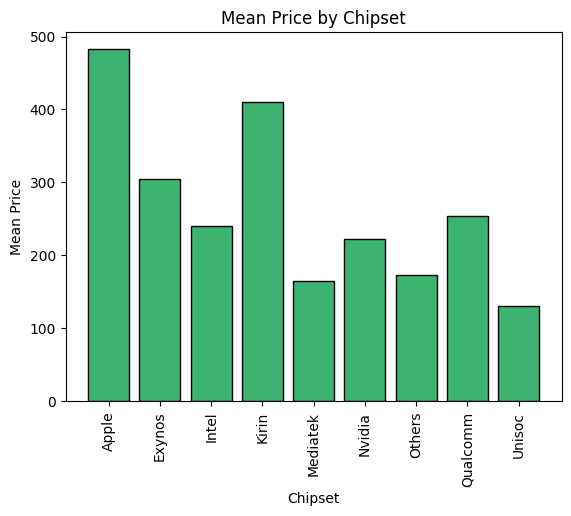

In [752]:
mean_prices = df.groupby('Chipset')['Price'].mean()

plt.bar(mean_prices.index, mean_prices.values, color='mediumseagreen', edgecolor='black')

plt.xlabel('Chipset')
plt.ylabel('Mean Price')
plt.xticks(rotation='vertical')
plt.title('Mean Price by Chipset')
plt.show()

From the plot, it's apparent that the selected chipset types are also likely to impact the prices of devices.

## Card Slot

In [753]:
def clean_card_slot(card_slot):
    if card_slot is not None and isinstance(card_slot, str):
        card_slot = card_slot.replace(',', '')
        return card_slot.strip()
        return None

df['Card slot'] = df['Card slot'].apply(clean_card_slot)

In [754]:
df['Card slot'] = df['Card slot'].str.split().str[0]

In [755]:
df['Card slot'].unique()

array(['microSDXC', 'microSDHC', 'No', 'Unspecified', 'NM', 'microSD',
       'Yes', 'SD'], dtype=object)

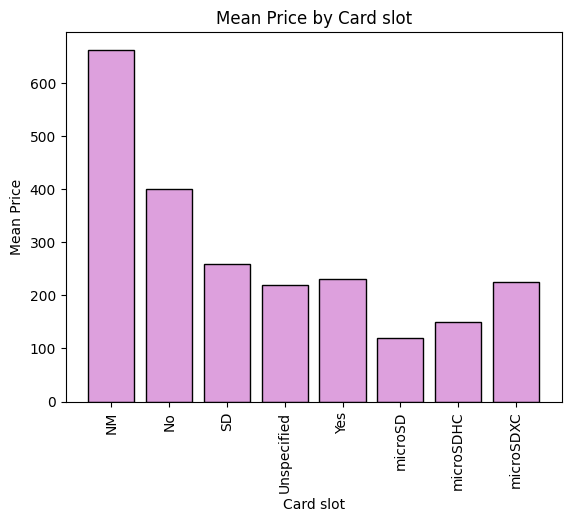

In [756]:
mean_prices = df.groupby('Card slot')['Price'].mean()

plt.bar(mean_prices.index, mean_prices.values, color='plum', edgecolor='black')

plt.xlabel('Card slot')
plt.ylabel('Mean Price')
plt.xticks(rotation='vertical')
plt.title('Mean Price by Card slot')
plt.show()

With a likelihood of more than 50%, we can say that the "card slot" column probably plays a role in building a better model. Therefore, we will include it for now and decide on its definitive use later through trial and error.

## drop wlan/color/network

In [757]:
df.drop(columns=['WLAN'], inplace=True)
df.drop(columns=['Colors'], inplace=True)
df.drop(columns=['Network'], inplace=True)
df.drop(columns=['Sensors'], inplace=True)

These three columns are excessively complicated, and to use them effectively, they need to be cleaned in a very detailed manner. Even after cleaning, the high number of unique values in them may not significantly improve our model.

Therefore, we will remove them for now.

In [758]:
df.columns

Index(['brand', '3G', '4G', '5G', 'Announced', 'Status', 'Weight', 'Length',
       'Width', 'Diameter', 'SIM', 'Display Type', 'Display Size', 'ppi',
       'body ratio', 'OS', 'battery_capacity', 'Price', 'CPU', 'ratio',
       'pixel', 'GPU', 'Loudspeaker', '3.5mm jack', 'Chipset', 'Card slot',
       'RAM', 'Storage'],
      dtype='object')

## Handling Missing Values

In [759]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             2651 non-null   object 
 1   3G                2651 non-null   bool   
 2   4G                2651 non-null   bool   
 3   5G                2651 non-null   bool   
 4   Announced         2651 non-null   float64
 5   Status            2651 non-null   object 
 6   Weight            2651 non-null   float64
 7   Length            2647 non-null   float64
 8   Width             2650 non-null   float64
 9   Diameter          2646 non-null   float64
 10  SIM               2651 non-null   object 
 11  Display Type      2651 non-null   object 
 12  Display Size      2651 non-null   float64
 13  ppi               2651 non-null   float64
 14  body ratio        2651 non-null   float64
 15  OS                2651 non-null   object 
 16  battery_capacity  2651 non-null   float64


### Length Width Diameter

In [760]:
mean_length = df['Length'].mean()
mean_width = df['Width'].mean()
mean_diameter = df['Diameter'].mean()

df['Length'].fillna(mean_length, inplace=True)
df['Width'].fillna(mean_width, inplace=True)
df['Diameter'].fillna(mean_diameter, inplace=True)

In [761]:
df.describe()

,Announced,Weight,Length,Width,Diameter,Display Size,ppi,body ratio,battery_capacity,Price,CPU,pixel,RAM,Storage
count,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2372.000000,2.651000e+03,2651.000000,2651.000000
mean,2016.577518,190.389325,154.623083,79.658981,9.101209,5.759838,312.312335,71.775556,3385.437948,242.896775,5.847808,1.576779e+06,2.901974,46.621613
std,3.656827,97.208564,31.560646,26.150419,1.640071,1.628346,101.907171,11.262514,1627.512406,193.726059,2.372880,1.181280e+06,2.493559,60.823522
min,2010.000000,89.300000,98.700000,46.000000,4.700000,2.200000,121.000000,25.500000,50.000000,20.000000,2.000000,7.680000e+04,0.062500,0.039062
25%,2014.000000,140.100000,136.500000,68.550000,8.000000,4.700000,233.000000,64.650000,2070.000000,130.000000,4.000000,5.184000e+05,1.000000,8.000000
50%,2016.000000,167.000000,152.400000,74.000000,8.800000,5.500000,288.000000,71.400000,3000.000000,190.000000,8.000000,1.094400e+06,2.000000,16.000000
75%,2020.000000,195.000000,163.300000,76.700000,9.800000,6.530000,400.000000,81.800000,4500.000000,290.000000,8.000000,2.527200e+06,4.000000,64.000000
max,2024.000000,950.000000,333.000000,252.700000,20.100000,14.600000,807.000000,94.100000,11560.000000,2000.000000,10.000000,8.294400e+06,16.000000,512.000000


### CPU

In [762]:
cpu_counts = df.groupby(['OS', 'brand', 'CPU']).size().reset_index(name='COUNT')
max_cpu = cpu_counts.loc[cpu_counts.groupby(['OS', 'brand'])['COUNT'].idxmax()]
max_cpu.drop(columns='COUNT', inplace=True)
max_cpu.head()

,OS,brand,CPU
1,Android,alcatel,4.0
4,Android,asus,4.0
8,Android,blu,4.0
12,Android,htc,8.0
16,Android,huawei,8.0


In [763]:
for index, row in df.iterrows():
    if pd.isnull(row['CPU']):
        os_value = row['OS']
        brand_value = row['brand']
        
        matching_rows = max_cpu[(max_cpu['OS'] == os_value) & (max_cpu['brand'] == brand_value)]
        
        if not matching_rows.empty:
            corresponding_cpu = matching_rows.iloc[0]['CPU']
            df.at[index, 'CPU'] = corresponding_cpu
        else:
            print(os_value, brand_value)
            df.at[index, 'CPU'] = 4


df['CPU'].isnull().sum()

Mobile htc
Phone lg
Phone lg
platform nokia
platform nokia
platform nokia
platform nokia
platform nokia
Belle nokia
Anna nokia
Symbian nokia
Symbian nokia
Symbian nokia
FP1 nokia
FP1 nokia
Belle nokia
MeeGo nokia
Symbian nokia
Anna nokia
Anna nokia
Belle nokia
Belle nokia
Belle nokia
Symbian nokia
Belle nokia
Belle nokia
Belle nokia
Symbian nokia
Symbian nokia
Symbian nokia
Symbian nokia
Symbian nokia
Phone zte
Phone zte


0

In [764]:
df['CPU'].unique()

array([ 4.,  8.,  2.,  6.,  3., 10.])

## Handeling outliers

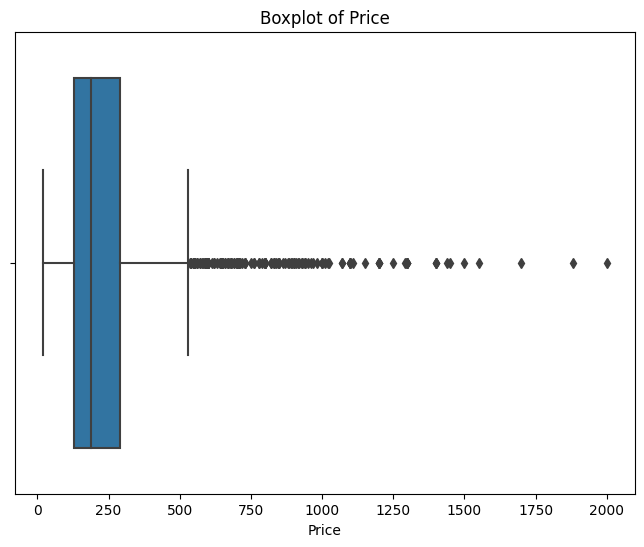

In [765]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

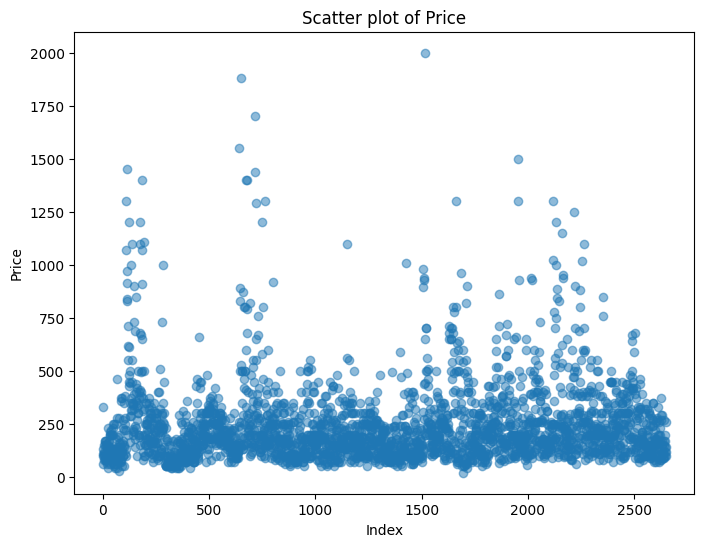

In [766]:
plt.figure(figsize=(8, 6))
plt.scatter(x=df.index, y=df['Price'], alpha=0.5)
plt.title('Scatter plot of Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

In [767]:
df['Price'] = df[df['Price'] <= 1250].Price

In [768]:
df.dropna(subset=['Price'], inplace=True)

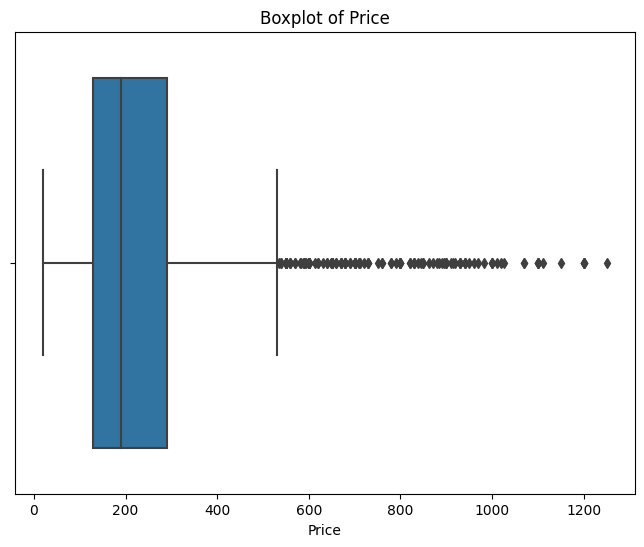

In [773]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

## Handling Categorical Variables:

In [769]:
label_encoder = LabelEncoder()

columns_to_encode = ['brand', 'ratio','OS' ,'GPU', 'Chipset', 'Status' ,'Card slot','SIM', 'Display Type']


for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [770]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2635 entries, 0 to 2650
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             2635 non-null   int32  
 1   3G                2635 non-null   bool   
 2   4G                2635 non-null   bool   
 3   5G                2635 non-null   bool   
 4   Announced         2635 non-null   float64
 5   Status            2635 non-null   int32  
 6   Weight            2635 non-null   float64
 7   Length            2635 non-null   float64
 8   Width             2635 non-null   float64
 9   Diameter          2635 non-null   float64
 10  SIM               2635 non-null   int32  
 11  Display Type      2635 non-null   int32  
 12  Display Size      2635 non-null   float64
 13  ppi               2635 non-null   float64
 14  body ratio        2635 non-null   float64
 15  OS                2635 non-null   int32  
 16  battery_capacity  2635 non-null   float64
 17  

## droped columns

| DELETED COLUMNS  |
|------------------|
| NAME             |
| Internal         |
| 2G               |
| WLAN             |
| COLORS           |
| SENSORS          |
| BLUETOOTH        |
| NETWORK          |

TOTAL COUNT: 8

## columns to keep

| COLUMNS TO KEEP FOR 100% |
|--------------------------|
| BRAND                    |
| DISPLAY TYPE             |
| OS                       |
| CPU                      |
| GPU                      |
| Chipset                  |
| RAM                      |
| Storage                  |

TOTAL COUNT: 8

| COLUMNS TO KEEP FOR 50% |
|-------------------------|
| 3G                      |
| 4G                      |
| 5G                      |
| SIM                     |
| Display Size            |
| ppi                     |
| body ratio              |
| battery_capacity        |
| pixel                   |


TOTAL COUNT: 6

| COLUMNS TO KEEP FOR LESS THAN 50% |
|-----------------------------------|
| Announced                         |
| Status                            |
| Weight                            |
| Length                            |
| Width                             |
| Loudspeaker                       |
| 3.5mm jack                        |
| Chipset                           |
| Card slot                         |
| ratio                             |


TOTAL COUNT: 10


In [771]:
df.columns

Index(['brand', '3G', '4G', '5G', 'Announced', 'Status', 'Weight', 'Length',
       'Width', 'Diameter', 'SIM', 'Display Type', 'Display Size', 'ppi',
       'body ratio', 'OS', 'battery_capacity', 'Price', 'CPU', 'ratio',
       'pixel', 'GPU', 'Loudspeaker', '3.5mm jack', 'Chipset', 'Card slot',
       'RAM', 'Storage'],
      dtype='object')

In [772]:
df.to_csv('price_data.csv', index=False)